**IMPORTING NECESSARY LIBRARIES**

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**TRAINING DATA**

In [2]:
# loading training data
data = pd.read_csv('train.csv')
print(data.shape)
print(data.columns)
data.head()

(13636, 15)
Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [4]:
data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [5]:
# calculating class distribution of rating column
ratings = data['Rating'].copy()
print('Class Distribution : ')
print(ratings.value_counts() / len(ratings))

Class Distribution : 
Rating
5    0.760560
0    0.093282
4    0.091009
3    0.026987
1    0.015400
2    0.012760
Name: count, dtype: float64


### PREPROCESSING

**PREPROCESSING NUMERICAL FEATURES**

In [6]:
# removing NULL values
data = data.dropna()
data.shape    # before --> (13636, 15)

(13634, 15)

In [7]:
# checking duplicate values
print('number of duplicate values : ', data.duplicated().sum())
# df.drop_duplicates(inplace=True)  # deleting duplicate values if present

number of duplicate values :  0


In [8]:
# function to remove irrelevant columns
def remove_column(data):
    # list of columns to remove 
    column_list = ['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName', 'CreationTimestamp']
    
    data = data.drop(column_list, axis=1)
    print(data.shape)
    print('Remaining columns : ', '\n', data.columns)

    return data



# calling remove_column function
data = remove_column(data)

(13634, 7)
Remaining columns :  
 Index(['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore', 'Recipe_Review'],
      dtype='object')


**Filtering outlier from the column UserReputation**

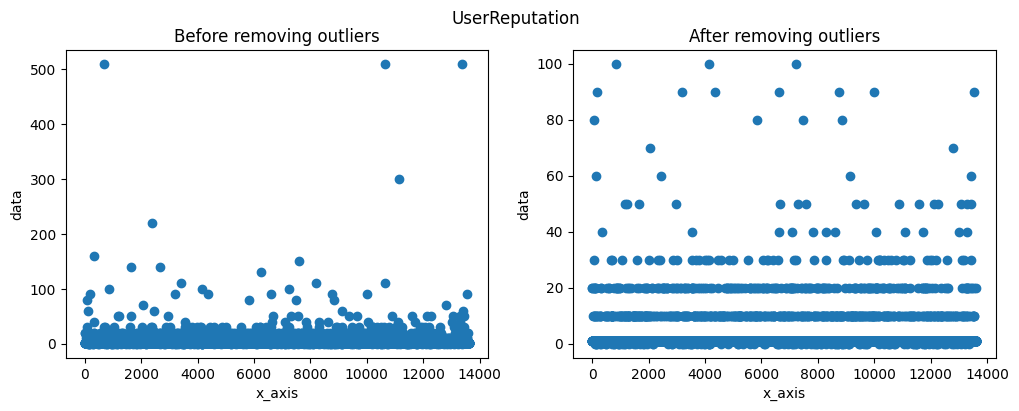

In [9]:
plt.figure(figsize=(12, 4))

# before removing outliers
col = 'UserReputation'

plt.subplot(1, 2, 1)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('Before removing outliers')

# ---------------------removing outliers---------------------
data = data[data[col]<=100]

# after removing outlier
plt.subplot(1, 2, 2)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('After removing outliers')

plt.suptitle(col)
plt.show()

**Filtering outlier from the column ThumbsUpCount**

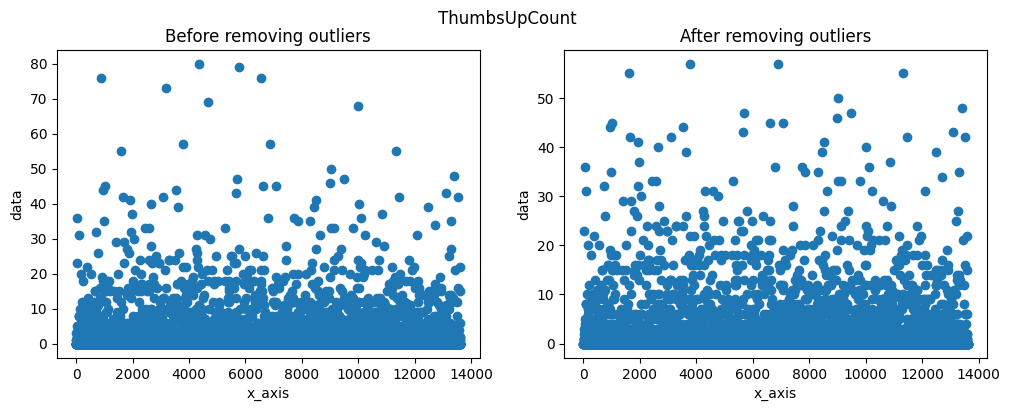

In [10]:
plt.figure(figsize=(12, 4))

# before removing outliers
col = 'ThumbsUpCount'

plt.subplot(1, 2, 1)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('Before removing outliers')

# ---------------------removing outliers---------------------
data = data[data[col]<=60]

# after removing outlier
plt.subplot(1, 2, 2)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('After removing outliers')

plt.suptitle(col)
plt.show()

**Filtering outlier from the column ThumbsDownCount**

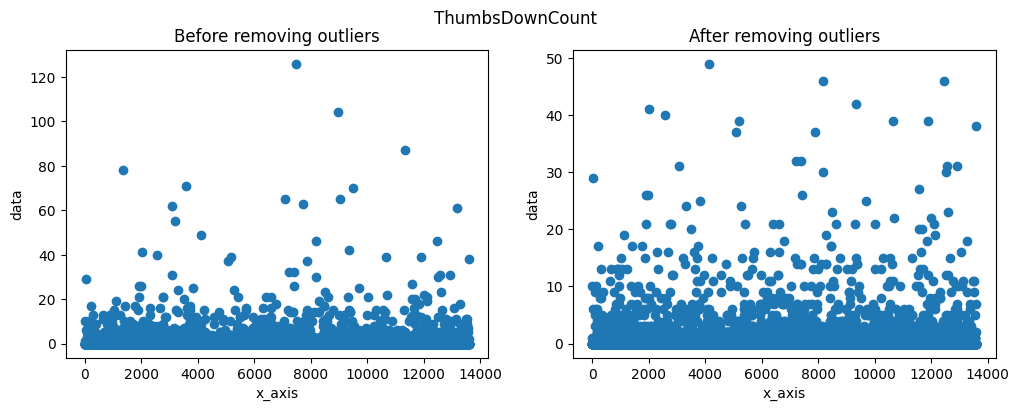

In [11]:
plt.figure(figsize=(12, 4))

# before removing outliers
col = 'ThumbsDownCount'

plt.subplot(1, 2, 1)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('Before removing outliers')

# ---------------------removing outliers---------------------
data = data[data[col]<=50]

# after removing outlier
plt.subplot(1, 2, 2)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('After removing outliers')

plt.suptitle(col)
plt.show()

**Filtering outlier from the column ReplyCount**

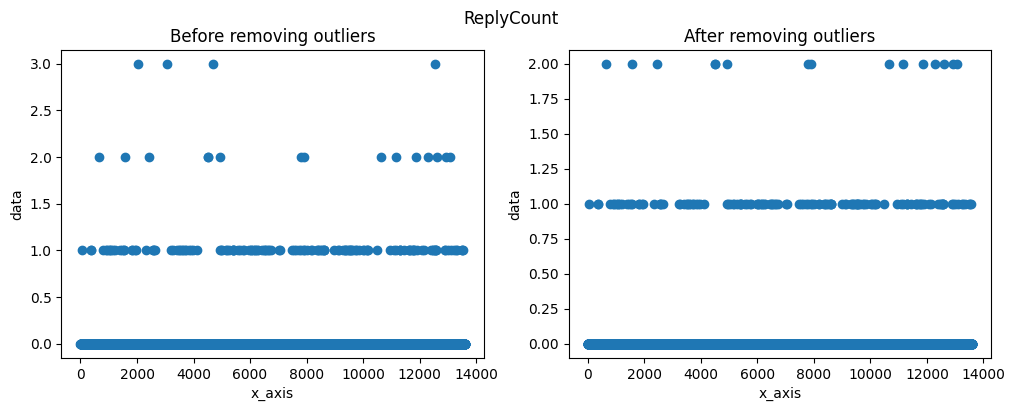

In [12]:
plt.figure(figsize=(12, 4))

# before removing outliers
col = 'ReplyCount'

plt.subplot(1, 2, 1)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('Before removing outliers')

# ---------------------removing outliers---------------------
data = data[data[col]<=2]

# after removing outlier
plt.subplot(1, 2, 2)
y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title('After removing outliers')

plt.suptitle(col)
plt.show()

**Plotting column BestScore**

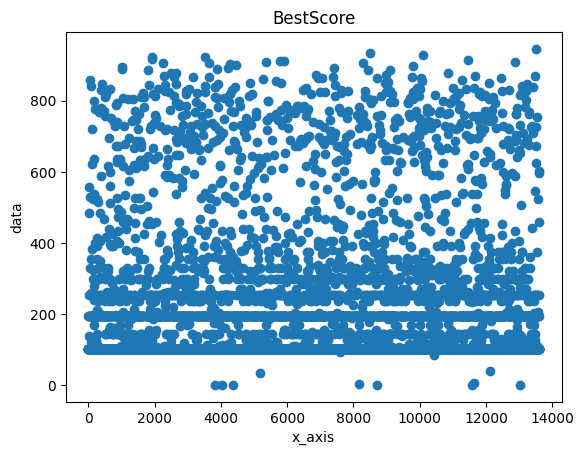

In [13]:
# plotting column BestScore
col = 'BestScore'

y = data[col].to_list()
x = np.arange(0, len(y), 1)
plt.scatter(x, y)
    
plt.xlabel('x_axis')
plt.ylabel('data')
plt.title(col)

plt.show()

In [14]:
print(data.shape) # previous --> (13634, 7)

(13598, 7)


**PREPROCESSING TEXT FEATURES**

In [15]:
def text_preprocessing(text):
    # removing paragraph tag
    pattern = r'<p[^>]*>(.*?)</p>'
    text = re.sub(pattern, r'\1', text)

    # transforming text to lower case
    text = text.lower()

    # complex pattern to remove specific formats
    pattern = r'(?:\d+(?:\.\d+)?(?:[a-z]+|%)|"\d{1,2}:\d{2}:\d{2}"|"\[[a-zA-Z0-9]+\]"|\([a-zA-Z0-9]+\)|https?://[^\s]+)'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # removing punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # removing numbers
    text = re.sub(r'\d+', '', text)

    # Replace extra spaces
    text = re.sub(r'\s+', ' ', text)

    return text

In [16]:
print(data.Recipe_Review[0]) # before preprocessing
print(text_preprocessing(data.Recipe_Review[0])) # after preprocessing

great recipe! I have made them just as written, wonderfull, moist, delicate flavor...then the next time, I did not have sour cream so used vanilla yogurt and added toffee pieces- still good.  I have made them as cupcakes and they rise very nicely and stay moist.
great recipe i have made them just as written wonderfull moist delicate flavorthen the next time i did not have sour cream so used vanilla yogurt and added toffee pieces still good i have made them as cupcakes and they rise very nicely and stay moist


In [17]:
# Applying preprocessing to column 'Recipe_Review'
data['Recipe_Review'] = data['Recipe_Review'].apply(text_preprocessing)

In [18]:
print(data.shape)
data.head()

(13598, 7)


,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,20,0,0,0,5,100,great recipe i have made them just as written ...
1,1,0,0,1,5,100,this is an easy and quick recipe that is great...
2,1,0,0,0,3,100,i think i was looking for something extra spec...
3,1,0,0,0,5,100,this is our favorite grilled chicken recipe gr...
4,1,0,0,0,4,100,great basic recipe i added teaspoons tuscan se...


**CREATING PIPELINE AND TRAINING**

In [19]:
numerical_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
text_features = 'Recipe_Review'
target_column = 'Rating'

In [20]:
Y = data[target_column]
X = data.drop(target_column, axis=1)
print(X.shape, Y.shape)

(13598, 6) (13598,)


In [21]:
# Function for scaling data into a suitable scale(0, 5)
def scale(data):
    scaler = MinMaxScaler(feature_range=(0,5))
    data = scaler.fit_transform(data)
    return data

In [22]:
# Creating pipeline for preprocessing numerical data
numerical_transformer = Pipeline(
    steps=[
        ('scaler', MinMaxScaler(feature_range=(0,5)))
    ]
)

In [23]:
# Creating pipeline for preprocessing text data

# textual_transformer = Pipeline(
#     steps=[
#         ('CountVectorizer', CountVectorizer(ngram_range=(2, 3), max_features=10000))
#     ]
# )

textual_transformer = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(max_features=10000))
    ]
)

In [24]:
# Combine them into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('text_review', textual_transformer, text_features)
    ],
    remainder='passthrough' # This ensures that any columns not specified are passed through without transformation
)

In [25]:
# Random Forest Classifier
# model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Logistic Regression Algorithm
model = LogisticRegression(solver = 'liblinear', max_iter=400)

In [26]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ]
)

In [27]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10878, 6) (10878,) (2720, 6) (2720,)


In [28]:
# training
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler(feature_range=(0,
                                                                                               5)))]),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('text_review',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=10000))]),
                                                  'Recipe_Review')])),
                ('model',
                 LogisticRegression(max_iter=400, solver='liblinear'))])

In [29]:
# Predict and evaluate the model
y_pred = pipeline.predict(x_test)
print(y_pred)

[5 5 5 ... 5 5 5]


In [30]:
# score(TfidfVectorizer, LogisticRegression) : training - 0.78, testing - 0.76
# score(TfidfVectorizer, RandomForest) : training - 0.99, testing - 0.76
# score(CountVectorizer, LogisticRegression) : training - 0.94, testing - 0.76
# score(CountVectorizer, RandomForest) : training - 0.99, testing - 0.76

print("Training Score", pipeline.score(x_train, y_train))
print("Testing Score", pipeline.score(x_test, y_test))

Training Score 0.7893914322485751
Testing Score 0.7650735294117647


In [31]:
print(np.unique(y_pred))


# count
y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts()

[0 1 3 4 5]


5    2608
4      54
0      38
3      10
1      10
Name: count, dtype: int64